In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

from plotly.subplots import make_subplots
import math
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")


In [388]:
df=pd.read_csv("Zomato.csv")

In [389]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [390]:
df.shape

(51717, 17)

In [391]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [393]:
df.duplicated().sum()

0

In [394]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [395]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<Axes: ylabel='votes'>

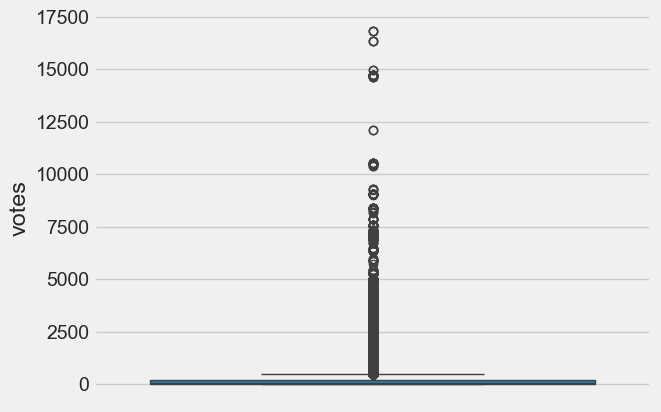

In [396]:
sns.boxplot(df['votes'])

- Upon reviewing the dataset, we identified several key insights :

   * 1. We have only one numerical column.

   * 2. Four columns have null values, and one of them which is rest_type has nearly more than 50% of its values equal to  null.

   * 3. Multiple columns may not add value to our dataset like: "url" , "address" , "menu_item " and "phone". So we can drop them.

   * 4.  The 'votes' column has a lot of outliers , we might try handling them by taking the log of the values. 

In [397]:
temp=list(df.isna().sum())

lst=[]
i=0
for col in df.columns:
    insert_lst=[col,temp[i]]
    if temp[i]!=0:
      lst.append(insert_lst)
    i+=1

temp_df=pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [398]:
fig=px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',orientation='h',height=500,width=900,color='Missing_Values',text='Missing_Values',title="Missing Values in training dataset")  
fig.update_traces(textposition='outside')
fig.show()

In [399]:
df.drop(columns=['dish_liked','url','address','menu_item','phone'],inplace=True) 

# I dropped also the dish_liked column due to its high number of null values

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


<Axes: ylabel='votes'>

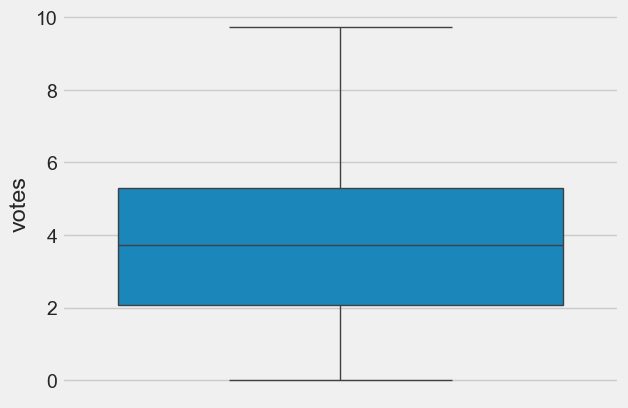

In [400]:
df['votes']=np.log1p(df['votes'])
df['votes'].value_counts().sum()

sns.boxplot(df['votes'])

- The outlier values have been significantly reduced, and we will keep the dataset in its current form for now.

In [401]:
ColumnsToFill=['rate' , 'approx_cost(for two people)', 'rest_type', 'cuisines', 'location']

for i in ColumnsToFill :
    df[i]=df[i].fillna(df[i].mode()[0])
    #print(df[i].mode())

df[ColumnsToFill].isna().sum()

rate                           0
approx_cost(for two people)    0
rest_type                      0
cuisines                       0
location                       0
dtype: int64

In [402]:
df['name'].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64

-  **Does the demography of an area matters?**
   * In this dataset, we don't have any demographic columns, so we can't answer this question in a direct way.

-  **Does location of a particular type of restaurant also depends on the people living in that area?**

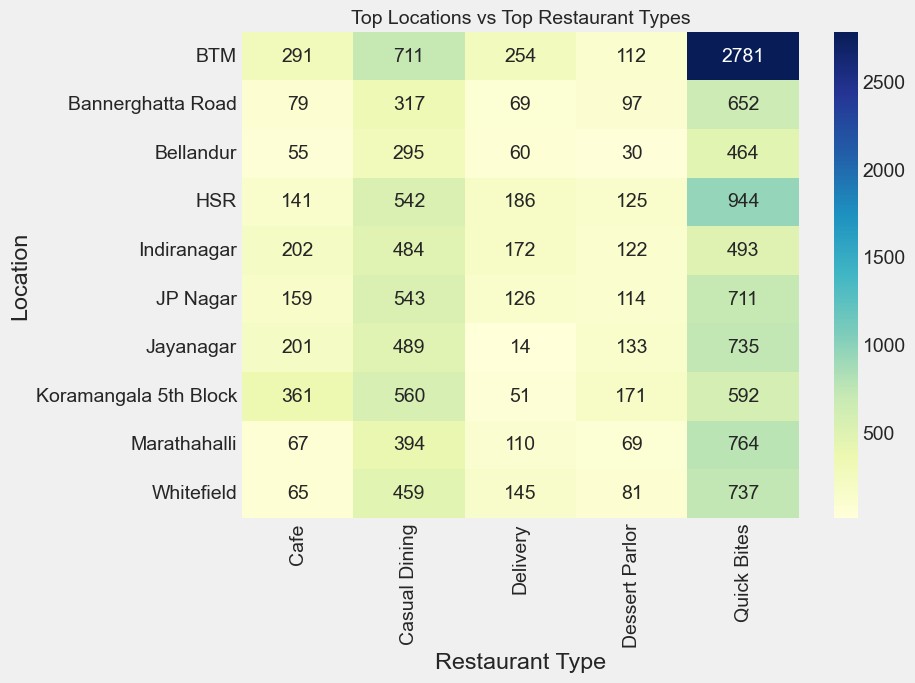

In [403]:
top_locations = df['location'].value_counts().head(10).index

top_rest_types = df['rest_type'].value_counts().head(5).index

filtered_df = df[df['location'].isin(top_locations) & df['rest_type'].isin(top_rest_types)]

pivot_table = pd.crosstab(filtered_df['location'], filtered_df['rest_type'])

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Top Locations vs Top Restaurant Types", fontsize=14)
plt.xlabel("Restaurant Type")
plt.ylabel("Location")
plt.show()


- From this heatmap, we can infer that certain restaurant types are more common in specific locations, which may indirectly reflect the preferences, spending capacity, or lifestyle of the people living in that area.

- **Does the theme of the restaurant matters?**

In [404]:


df['rate'] = df['rate'].replace('NEW', np.nan)      
df['rate'] = df['rate'].replace('-', np.nan)         
df['rate'] = df['rate'].str.strip()                  

df['rate'] = df['rate'].str.split('/').str[0]


df['rate'] = df['rate'].astype(float)




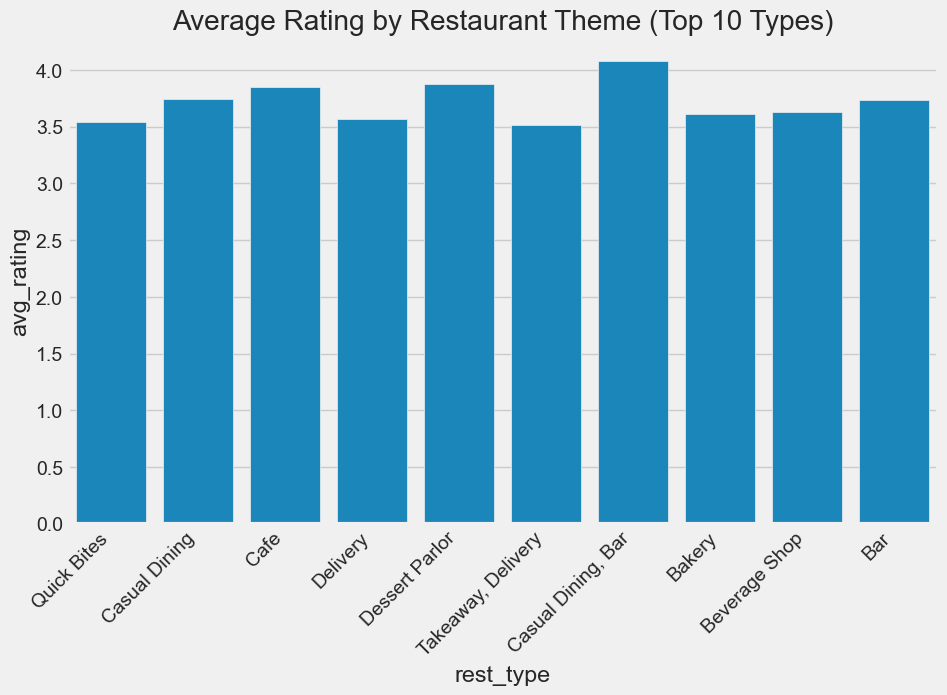

In [405]:
top_10_types = df['rest_type'].value_counts().head(10).index
df_top = df[df['rest_type'].isin(top_10_types)]


theme_stats = df_top.groupby('rest_type').agg(
    avg_rating=('rate', 'mean'),
    
    count=('rest_type', 'size')
).sort_values(by='count', ascending=False)




plt.figure(figsize=(10,6))
sns.barplot(data=theme_stats.reset_index(), x='rest_type', y='avg_rating', order=theme_stats.index)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Restaurant Theme (Top 10 Types)')
plt.show()




- Theme doesn’t appear to matter

- Why? Because the top restaurant types have similar average ratings.
This suggests that fine dining restaurants—which usually have a luxurious theme and layout—do not perform significantly better in ratings compared to quick bites restaurants, which typically have a simpler, more casual theme.

- **Is a particular neighborhood famous for its own kind of food?**

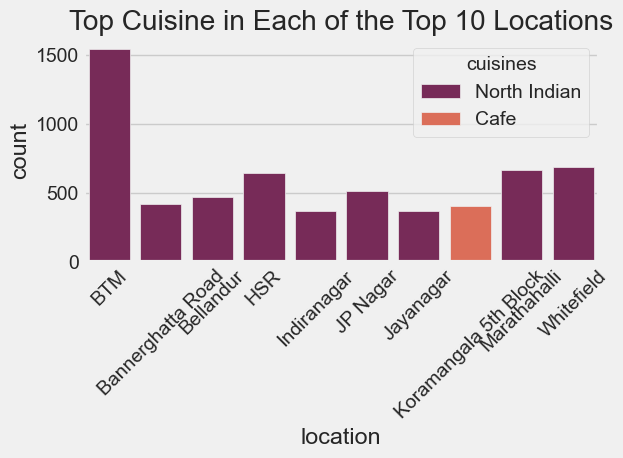

In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is df
top_locations = df['location'].value_counts().nlargest(10).index
df_top_locations = df[df['location'].isin(top_locations)]

# Count cuisines per location
location_cuisine_counts = (
    df_top_locations
    .groupby(['location', 'cuisines'])
    .size()
    .reset_index(name='count')
)

# For each location, keep only the top cuisine
top_cuisine_per_location = (
    location_cuisine_counts
    .loc[location_cuisine_counts.groupby('location')['count'].idxmax()]
)

# Plot with rocket color palette
sns.barplot(
    x='location',
    y='count',
    hue='cuisines',
    data=top_cuisine_per_location,
    palette=sns.color_palette("rocket", len(top_cuisine_per_location['cuisines'].unique()))
)

plt.xticks(rotation=45)
plt.title('Top Cuisine in Each of the Top 10 Locations')
plt.tight_layout()
plt.show()


- This plot shows the number of restaurants serving each location’s most common cuisine. In BTM, one cuisine clearly dominates, indicating a strong preference. In other locations, the distribution is more balanced, suggesting less influence from a single cuisine type.